# Notebook config constants & utility functions

In [1]:
## Constants
CONTENT_DIR         = "/content"
CROPS_DIR           = f"{CONTENT_DIR}/crops"
DATASET_DRIVE_ID    = "13WLaD5Hxi-vL5YFyYr_6HCKqVbnT5ofN"
DATASET_ROOT_DIR    = f"{CONTENT_DIR}/dataset"
DATASET_DIR         = f"{DATASET_ROOT_DIR}/2022-DC03"
IMAGES_DIR          = f"{CONTENT_DIR}/images"
ANNOTATIONS_DIR     = f"{CONTENT_DIR}/annotations"
YOLACT_REPO         = "https://github.com/dbolya/yolact.git"
YOLACT_DIR          = f"{CONTENT_DIR}/yolact"
WEIGHTS_DRIVE_URL   = r"https://drive.google.com/uc?id=1tvqFPd4bJtakOlmn-uIA492g2qurRChj"
WEIGHTS_PATH        = f"{YOLACT_DIR}/weights/resnet101_reducedfc.pth"
TMP_DIR             = f"{CONTENT_DIR}/tmp"
RES_DIR             = f"{CONTENT_DIR}/res"
YOLOACT_RESULTS_DIR = f"{YOLACT_DIR}/results"
MLA_REPO_GIT        = "https://github.com/claudiotancredi/Machine-learning-in-applications.git"
MLA_REPO_DIR        = f"{CONTENT_DIR}/mlinapptests"
SCORE_THRESHOLD_ONE = 0.80
SCORE_THRESHOLD_TWO = 0.95

# if by any chance this noteboks stops working uncomment the line beneath
#!pip install torch==1.11.0 torchvision==0.12.0
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-d6eea9c3-67bc-7bee-ea52-2f13e63f8d72)


# Downloads, Splits, Dependencies

In [2]:
## Download Dataset
import os
import gdown
from shutil import rmtree as rm

if os.path.isdir(DATASET_ROOT_DIR):
  rm(DATASET_ROOT_DIR)
os.mkdir(DATASET_ROOT_DIR)

gdown.download_folder(id=DATASET_DRIVE_ID, output=DATASET_DIR)

Retrieving folder list


Processing file 1a38xTTyMoKaOBjSZRnOjBbKJTk_idolY images.zip
Processing file 1tjfLz_STN4x0E3TYgZqvVEMFe8tzL-nV rcgx12-69-40.0.pth
Processing file 1IRgci610Fin_Shtdbppnp-xpAZyeHxy3 reqs.txt
Processing file 1W2MdqCYXfgdXg7qsBQN1WxKr36Gb79BG test.json
Processing file 1uq7BkUQoRwXjTsXOmFFkfvoECEVZorZb train.json
Processing file 1hQUE1mu1X3X8TFBS4FrxBVaOmom04Bs4 val.json
Processing file 1quLmjsU47rOxGlRqPSEbzk7gotpBRiDX yolact_epochs.patch
Processing file 1Y3ii1lVZHrJCMkPBdtmo-YI3wXmtMiCj yolact_lrsteps.patch
Processing file 1mXuLf3L6O4u-JSWGpTC8Uy7OagYjYf5w yolact-cnga12-89-20.88.pth
Processing file 1KQqZaMp30VkAhgQD0s9FMBriLiwhVVgK yolact-rngn12-205-41.01.pth
Processing file 17rQDA11kDpJwgz0FBhN7j8eZgXHnF-4_ yolact-rngn19-287-30.09.pth
Processing file 1pjJcNmrV_JZAxDxPONFGkpwnrx9xG7SO yolact.patch
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1a38xTTyMoKaOBjSZRnOjBbKJTk_idolY
To: /content/dataset/2022-DC03/images.zip
100%|██████████| 1.04G/1.04G [00:06<00:00, 164MB/s]
Downloading...
From: https://drive.google.com/uc?id=1tjfLz_STN4x0E3TYgZqvVEMFe8tzL-nV
To: /content/dataset/2022-DC03/rcgx12-69-40.0.pth
100%|██████████| 199M/199M [00:01<00:00, 174MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IRgci610Fin_Shtdbppnp-xpAZyeHxy3
To: /content/dataset/2022-DC03/reqs.txt
100%|██████████| 95.0/95.0 [00:00<00:00, 255kB/s]
Downloading...
From: https://drive.google.com/uc?id=1W2MdqCYXfgdXg7qsBQN1WxKr36Gb79BG
To: /content/dataset/2022-DC03/test.json
100%|██████████| 4.28M/4.28M [00:00<00:00, 27.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1uq7BkUQoRwXjTsXOmFFkfvoECEVZorZb
To: /content/dataset/2022-DC03/train.json
100%|██████████| 14.7M/14.7M [00:00<00:00, 217MB/s]
Downloading...
From: https://drive.g

['/content/dataset/2022-DC03/images.zip',
 '/content/dataset/2022-DC03/rcgx12-69-40.0.pth',
 '/content/dataset/2022-DC03/reqs.txt',
 '/content/dataset/2022-DC03/test.json',
 '/content/dataset/2022-DC03/train.json',
 '/content/dataset/2022-DC03/val.json',
 '/content/dataset/2022-DC03/yolact_epochs.patch',
 '/content/dataset/2022-DC03/yolact_lrsteps.patch',
 '/content/dataset/2022-DC03/yolact-cnga12-89-20.88.pth',
 '/content/dataset/2022-DC03/yolact-rngn12-205-41.01.pth',
 '/content/dataset/2022-DC03/yolact-rngn19-287-30.09.pth',
 '/content/dataset/2022-DC03/yolact.patch']

In [3]:
## Extract Dataset
import os
from shutil import unpack_archive as unzip
from shutil import rmtree         as rm

dst = os.path.join(IMAGES_DIR, "all")
src = os.path.join(DATASET_DIR, "images.zip")

if os.path.isdir(IMAGES_DIR):
  rm(IMAGES_DIR)

os.mkdir(IMAGES_DIR)
os.mkdir(dst)

unzip(src, dst)

In [4]:
## Keep just one tool or every one of them
from shutil import copyfile as copy
from shutil import rmtree   as rm
import os
import json
from pycocotools.coco import COCO


def pick_class(cls, src, dst):
  if not os.path.isfile(src):
    raise Exception(f"Error: {src} not found")

  # Trivial Case
  if cls == "all":
    copy(src, dst)
    return
  
  if cls not in ["CNGA12", "RCGX12", "RNGN19", "RNGN12"]:
    raise Exception("Invalid tool class")

  coco = COCO(src)
  
  imgs_delete_queue = [ img for img in coco.imgs if cls not in coco.imgs[img]["file_name"] ]
  anns_delete_queue = [ coco.anns[ann]["image_id"] for ann in coco.anns if coco.anns[ann]["area"] == 0]
  delete_queue = set(imgs_delete_queue + anns_delete_queue)

  for idx in delete_queue:
    del coco.imgs[idx]

  anns_delete_queue = [ ann for ann in coco.anns if coco.anns[ann]["image_id"] in delete_queue ]
  for idx in anns_delete_queue:
    del coco.anns[idx]

  # Recompose lists
  images        = [ coco.imgs[imgid] for imgid in coco.imgs ]
  annotations   = [ coco.anns[annid] for annid in coco.anns ]
  categories    = [ coco.cats[catid] for catid in coco.cats ]
  old_images_id = [ img["id"] for img in images ]

  for new_id, img in enumerate(images):
    img["id"] = new_id
  
  for new_ann_id, ann in enumerate(annotations):
    ann["id"] = new_ann_id
    new_img_id = old_images_id.index(ann["image_id"])
    ann["image_id"] = new_img_id
  coco = dict (
      images = images,
      annotations = annotations,
      categories = categories
  )

  with open(dst, "w") as f:
    json.dump(coco, f)


if os.path.isdir(ANNOTATIONS_DIR):
  rm(ANNOTATIONS_DIR)
os.mkdir(ANNOTATIONS_DIR)


tool_cls = "RNGN19"
splits = ["train", "test", "val" ]
file_names = [ f"{name}.json" for name in splits ]

for file_name in file_names:
  src = os.path.join(DATASET_DIR, file_name)
  dst = os.path.join(ANNOTATIONS_DIR, file_name)
  pick_class(tool_cls, src, dst)

for split in splits:
  dir = os.path.join(IMAGES_DIR, split)
  if os.path.isdir(dir):
    rm(dir)
  os.mkdir(dir)

  coco = os.path.join(ANNOTATIONS_DIR, f"{split}.json")
  coco = COCO(coco)

  file_names = [ coco.imgs[img_id]["file_name"] for img_id in coco.imgs ]
  for file_name in file_names:
    src = os.path.join(IMAGES_DIR, "all", file_name)
    dst = os.path.join(IMAGES_DIR, split, file_name)
    copy(src, dst)

loading annotations into memory...
Done (t=0.24s)
creating index...
index created!
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


# Phase 1 Model Download & Setup

In [5]:
## Download Yolact
import os
from shutil import copyfile as copy
from shutil import rmtree   as rm

if not os.path.isdir(YOLACT_DIR):
  os.mkdir(YOLACT_DIR)
  !git clone $YOLACT_REPO $YOLACT_DIR

if not os.path.isfile(WEIGHTS_PATH):
  dir = os.path.dirname(WEIGHTS_PATH)
  if not os.path.isdir(dir):
    os.mkdir(dir)
  gdown.download(WEIGHTS_DRIVE_URL, output=WEIGHTS_PATH)

## If possible copy weights of chosen class
cls_lower = tool_cls.lower()
files = os.listdir(DATASET_DIR)
files = [ file_name for file_name in files if cls_lower in file_name ]
if len(files) > 0:
  file_name = files[0]
  print(f"Found pretrained model {file_name} for tool {tool_cls}")
  src = os.path.join(DATASET_DIR, file_name)
  dst = os.path.join(YOLACT_DIR, "weights", file_name)
  pretrained_model_path = dst
  copy(src, dst)

Cloning into '/content/yolact'...
remote: Enumerating objects: 2936, done.
remote: Total 2936 (delta 0), reused 0 (delta 0), pack-reused 2936
Receiving objects: 100% (2936/2936), 21.20 MiB | 30.84 MiB/s, done.
Resolving deltas: 100% (2002/2002), done.


Downloading...
From: https://drive.google.com/uc?id=1tvqFPd4bJtakOlmn-uIA492g2qurRChj
To: /content/yolact/weights/resnet101_reducedfc.pth
100%|██████████| 171M/171M [00:03<00:00, 43.4MB/s]


Found pretrained model yolact-rngn19-287-30.09.pth for tool RNGN19


In [6]:
%%writefile /content/custom-config.py
wear_train_dataset = dataset_base.copy({
  'name': 'Single Label Wear Dataset',
  'train_info': '/content/annotations/train.json',
  'train_images': '/content/images/train',
  'valid_info': '/content/annotations/val.json',
  'valid_images': '/content/images/val',
  'class_names': ('WEAR', ),
  'label_map': { 1: 1, 2: 1, 3: 1 }
})

train_samples = dataset_base.copy({
  'name': 'Train Split',
  'valid_info': '/content/annotations/train.json',
  'valid_images': '/content/images/train',
  'class_names': ('WEAR', ),
  'label_map': { 1: 1, 2: 1, 3: 1 },
  'has_gt': True
})

val_samples = dataset_base.copy({
  'name': 'Val Split',
  'valid_info': '/content/annotations/val.json',
  'valid_images': '/content/images/val',
  'class_names': ('WEAR', ),
  'label_map': { 1: 1, 2: 1, 3: 1 },
  'has_gt': True
})

test_samples = dataset_base.copy({
  'name': 'Test Split',
  'valid_info': '/content/annotations/test.json',
  'valid_images': '/content/images/test',
  'class_names': ('WEAR', ),
  'label_map': { 1: 1, 2: 1, 3: 1 },
  'has_gt': True
})

phase_one_config = yolact_base_config.copy({
    'name': 'Yolact ResNet101',
    # Dataset stuff
    'dataset': wear_train_dataset,
    'num_classes': 2,

    # Image Size
    'max_size': 320,

    ## Add other stuff here...
    'max_iter' : int(1e8),
})

evaluation_config = phase_one_config.copy({
    'dataset': test_samples,
})

Writing /content/custom-config.py


In [7]:
# Append config
from os     import remove   
from shutil import copyfile as copy

os.chdir(YOLACT_DIR)
!git reset --hard -q
src = os.path.join(DATASET_DIR, "yolact.patch")
dst = os.path.join(YOLACT_DIR, "yolact.patch")
if os.path.isfile(dst):
  remove(dst)
copy(src, dst)
!git apply "yolact.patch"

custom_config = os.path.join(CONTENT_DIR, "custom-config.py")
yolact_config = os.path.join(YOLACT_DIR,  "data", "config.py")
!cat $custom_config >> "{yolact_config}"

# Model Phase 1 -- Training

In [8]:
## Train Yolact - Already done, commented for now
# import os
# import gdown
# 
# os.chdir(YOLACT_DIR)
# !python train.py --config=phase_one_config --dataset=wear_train_dataset

# Model Phase 1 -- Evaluation
### One pic per class

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
/usr/local/lib/python3.7/dist-packages/torch/jit/_recursive.py:239: UserWarning: 'pred_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
/usr/local/lib/python3.7/dist-packages/torch/jit/_recursive.py:239: UserWarning: 'lat_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
/usr/local/lib/python3.7/dist-packages/torch/jit/_recursive.py:239: UserWarning: 'downsample_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
Loading model... Done.

/content/images/test/RNGN19_GMTK2_20211004_000165_wn_cn.bmp -> /content/res/RNGN19_GMTK

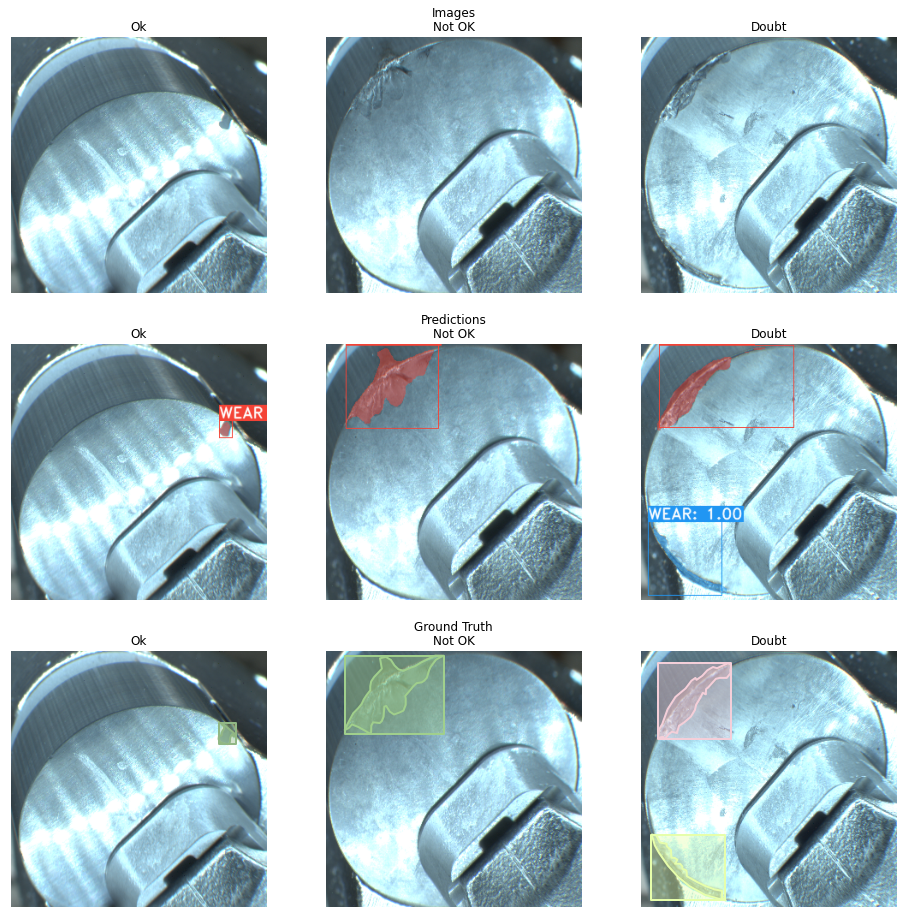

In [9]:
import os
import matplotlib.pyplot    as plt
import PIL.Image            as Image
from shutil import rmtree   as rmdir
from shutil import copyfile as copy
from os     import remove   as rm
from pycocotools.coco import COCO

def hide_stuff(axes):
  axes.set_xticks([])
  axes.set_yticks([])
  axes._frameon = False

if os.path.isdir(TMP_DIR):
  rmdir(TMP_DIR)
os.mkdir(TMP_DIR)

if os.path.isdir(RES_DIR):
  rmdir(RES_DIR)
os.mkdir(RES_DIR)

os.chdir(YOLACT_DIR)
coco = os.path.join(ANNOTATIONS_DIR, "test.json")
coco = COCO(coco)

filenames = [ coco.imgs[img]['file_name'] for img in coco.imgs ]

wo = [ filename for filename in filenames if "wo" in filename ][0]
wn = [ filename for filename in filenames if "wn" in filename ][0]
wd = [ filename for filename in filenames if "wd" in filename ][0]

wo_id = [ id for id in coco.imgs if coco.imgs[id]["file_name"] == wo ][0]
wn_id = [ id for id in coco.imgs if coco.imgs[id]["file_name"] == wn ][0]
wd_id = [ id for id in coco.imgs if coco.imgs[id]["file_name"] == wd ][0]

cats = coco.getCatIds()
_ids = [wo_id, wn_id, wd_id]

for cls in [wo, wn, wd]:
  src = os.path.join(IMAGES_DIR, "test", cls)
  dst = os.path.join(TMP_DIR, cls)
  copy(src, dst)

!python eval.py --trained_model=$pretrained_model_path --config=evaluation_config --score_threshold=0.8 --images=/content/images/test:/content/res

classes = ["Ok", "Not OK", "Doubt"]

fig, big_axes = plt.subplots(figsize=(16, 16), nrows=3, ncols=1, sharey=True)
rows_names = ["Images", "Predictions", "Ground Truth"]
col_names = ["Ok", "Not Ok", "Doubt"]

for row, big_ax in enumerate(big_axes, start=1):
  big_ax.set_title(rows_names[row-1], pad=20)
  hide_stuff(big_ax)

for idx, img in enumerate([wo, wn, wd], start=1):
  ## Plain Image
  path = os.path.join(TMP_DIR, img)
  canvas = Image.open(path)
  axs = fig.add_subplot(3, 3, idx)
  hide_stuff(axs)
  axs.set_title(classes[idx-1])
  plt.imshow(canvas)

  ## Prediction
  path = os.path.join(RES_DIR, img)[:-4] + ".png"
  canvas = Image.open(path)
  axs = fig.add_subplot(3, 3, idx + 3)
  hide_stuff(axs)
  axs.set_title(classes[idx-1])
  plt.imshow(canvas)

  ## Ground Truth
  path = os.path.join(TMP_DIR, img)
  canvas = Image.open(path)
  axs = fig.add_subplot(3, 3, idx + 6)
  hide_stuff(axs)
  axs.set_title(classes[idx-1])
  axs.imshow(canvas)
  anns = coco.getAnnIds(imgIds = _ids[idx-1], catIds=cats, iscrowd=None)
  anns = coco.loadAnns(anns)
  coco.showAnns(anns, draw_bbox=True)

plt.show()

In [10]:
# Compute mAP and FPS
os.chdir(YOLACT_DIR)
!python eval.py --trained_model=$pretrained_model_path --config=evaluation_config --dataset=test_samples

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
/usr/local/lib/python3.7/dist-packages/torch/jit/_recursive.py:239: UserWarning: 'downsample_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
/usr/local/lib/python3.7/dist-packages/torch/jit/_recursive.py:239: UserWarning: 'pred_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
/usr/local/lib/python3.7/dist-packages/torch/jit/_recursive.py:239: UserWarning: 'lat_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
Loading model... Done.

Processing Images  ██████████████████████████████     47 /     47 (100.00%)    10.64 fp

# Model Phase 1.5
## Produce output for Phase 2

In [13]:
## Detect masks/bboxes on images
import shutil
import numpy as np
import os
from   PIL import Image
from   pycocotools.mask import decode

def bitmap_from_mask(mask):
  bitmap = decode(mask["segmentation"])
  return bitmap

def bbox_from_mask(mask):
  bitmap = bitmap_from_mask(mask)
  bitmap = np.where(bitmap != 0)
  # 0 are cols, 1 are rows
  # so this is
  # y1, y2, x1, x2
  bbox = np.min(bitmap[0]), np.max(bitmap[0]), np.min(bitmap[1]), np.max(bitmap[1])
  bbox = [ int(elem) for elem in bbox ]
  return bbox

def area_from_mask(mask):
  bitmap = bitmap_from_mask(mask)
  area   = int(bitmap.sum())
  return area

def crop_image(file_path, bbox):
  if not os.path.isfile(file_path):
    raise Exception(f"File not found: {file_path}")

  fig = Image.open(file_path)
  fig = np.array(fig)
  y1, y2, x1, x2 = bbox
  crop = fig[y1:y2, x1:x2]
  crop = Image.fromarray(crop)
  return crop

if not os.path.isdir(MLA_REPO_DIR):
  !git clone $MLA_REPO_GIT $MLA_REPO_DIR

if os.path.isdir(CROPS_DIR):
  shutil.rmtree(CROPS_DIR)
os.mkdir(CROPS_DIR)

for split in ["train", "test", "val"]:
  dir = os.path.join(CROPS_DIR, split)
  os.mkdir(dir)

os.chdir(YOLACT_DIR)

for split in ["val", "train", "test"]:
    dataset = f"{split}_samples"
    !python eval.py --trained_model=$pretrained_model_path --config=evaluation_config --score_threshold=0.5 --dataset=$dataset --output_coco_json

    src = os.path.join(YOLACT_DIR, "results", "mask_detections.json")
    dst = os.path.join(YOLACT_DIR, "results", f"masks_{split}.json")
    json_path = dst

    shutil.copyfile(src, dst)

    anns = os.path.join(ANNOTATIONS_DIR, f"{split}.json")
    coco = COCO(anns)

    areas = { id : { "area": 0, "bbox": [], "file_name" : coco.imgs[id]["file_name"], "score": 0.0 } for id in coco.imgs }
    filenames = { id: coco.imgs[id]["file_name"] for id in coco.imgs }

    with open(json_path, "r") as split_json:
      masks_json = json.load(split_json)

    for mask in masks_json:
      # Need: (y1, x1, y2, x2)]
      image_id = mask["image_id"]
      threshold = mask["score"]
      score = mask["score"]
      if score < SCORE_THRESHOLD_ONE:
        continue
      try:
        bbox = bbox_from_mask(mask)
      except:
        print(f"Image {areas[image_id]['file_name']} raised an exception, skipping")
        continue
      new_area = area_from_mask(mask)
      old_area = areas[image_id]["area"]

      if new_area > old_area:
        txt = f"Replacing area of size {old_area} with score {areas[image_id]['score']} with area of size {new_area} with score {score}"
        print(txt)
        areas[image_id]["area"] = new_area
        areas[image_id]["bbox"] = bbox
        areas[image_id]["score"] = score
    
    for id in areas:
      score = areas[id]["score"]
      bbox  = areas[id]["bbox"]
      if score < SCORE_THRESHOLD_TWO and split is not "test":
        print(f"Detection on file {areas[id]['file_name']} had a score too low ({score})")
        continue
      if len(bbox) < 4:
        continue
      src = os.path.join(IMAGES_DIR, split, areas[id]["file_name"])
      dst = os.path.join(CROPS_DIR, split, areas[id]["file_name"])[:-4] + ".jpg"
      crop = crop_image(src, bbox)
      crop.save(dst)

    if split == "test":
      output = []
      for id in areas:
        name = areas[id]["file_name"]
        try:
          y1, y2, x1, x2 = areas[id]["bbox"]
          bbox = [y1, x1, y2, x2]
        except:
          bbox = []
        output.append( dict(name=name, bbox=bbox) )
      dst = os.path.join(CROPS_DIR, "test.json")
      with open(dst, "w") as json_dst:
        json.dump(output, json_dst)
      # Forgive me.
      os.chdir(CROPS_DIR)
      os.system(f"zip -r {tool_cls}_crops.zip *")


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
/usr/local/lib/python3.7/dist-packages/torch/jit/_recursive.py:239: UserWarning: 'lat_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
/usr/local/lib/python3.7/dist-packages/torch/jit/_recursive.py:239: UserWarning: 'pred_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
/usr/local/lib/python3.7/dist-packages/torch/jit/_recursive.py:239: UserWarning: 'downsample_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
Loading model... Done.

Processing Images  ██████████████████████████████     20 /     20 (100.00%)     9.20 fp